In [16]:
import pandas as pd
import re

from sklearn.feature_extraction.text import CountVectorizer

In [17]:
df = pd.read_csv('disney-dataset.csv')

df = df.drop(['Review_ID', 'Year_Month', 'Reviewer_Location', 'Branch'], axis=1)
df = df.rename(columns={'Rating': 'rating', 'Review_Text': 'review'})

df.head()

,rating,review
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


### QUESTÃO 1

In [18]:
from sklearn.preprocessing import FunctionTransformer

def remover_espacos_em_branco(x):
    frases = list()
    for review in x:
        review_regex = re.sub(r'\s+', ' ', review).lower()
        frases.append(review_regex.split(" "))
    return frases

ft = FunctionTransformer(remover_espacos_em_branco)

df['q1'] = ft.fit_transform(df['review'])
df.head()

,rating,review,q1
0,4,If you've ever been to Disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh..."
1,4,Its been a while since d last time we visit HK...,"[its, been, a, while, since, d, last, time, we..."
2,4,Thanks God it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,4,HK Disneyland is a great compact park. Unfortu...,"[hk, disneyland, is, a, great, compact, park.,..."
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,..."


### QUESTÃO 2

In [19]:
!pip install Unidecode
from unidecode import unidecode

def remover_caracteres_indesejados(x):
    frases = list()
    for review in x:
        review_sem_char = unidecode(review).lower()
        frases.append(review_sem_char)
    return frases

ft = FunctionTransformer(remover_caracteres_indesejados)

df['q2'] = ft.fit_transform(df['review'])
df.head()

,rating,review,q1,q2
0,4,If you've ever been to Disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh...",if you've ever been to disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...,"[its, been, a, while, since, d, last, time, we...",its been a while since d last time we visit hk...
2,4,Thanks God it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ...",thanks god it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...,"[hk, disneyland, is, a, great, compact, park.,...",hk disneyland is a great compact park. unfortu...
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,...","the location is not in the city, took around 1..."


### QUESTÃO 3

In [20]:
bins = [0, 2, 3, 5]
labels = ['Ruim', 'Neutro', 'Bom']

df['q3'] = pd.cut(df['rating'], bins=bins, labels=labels, right=False)
df.head()

,rating,review,q1,q2,q3
0,4,If you've ever been to Disneyland anywhere you...,"[if, you've, ever, been, to, disneyland, anywh...",if you've ever been to disneyland anywhere you...,Bom
1,4,Its been a while since d last time we visit HK...,"[its, been, a, while, since, d, last, time, we...",its been a while since d last time we visit hk...,Bom
2,4,Thanks God it wasn t too hot or too humid wh...,"[thanks, god, it, wasn, t, too, hot, or, too, ...",thanks god it wasn t too hot or too humid wh...,Bom
3,4,HK Disneyland is a great compact park. Unfortu...,"[hk, disneyland, is, a, great, compact, park.,...",hk disneyland is a great compact park. unfortu...,Bom
4,4,"the location is not in the city, took around 1...","[the, location, is, not, in, the, city,, took,...","the location is not in the city, took around 1...",Bom


### QUESTÃO 4

In [21]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df['review'])
print(bag_of_words.shape)

(42656, 53085)


### QUESTÃO 5

In [22]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df['review'])
print(bag_of_words.shape)

(42656, 50)


### QUESTÃO 6

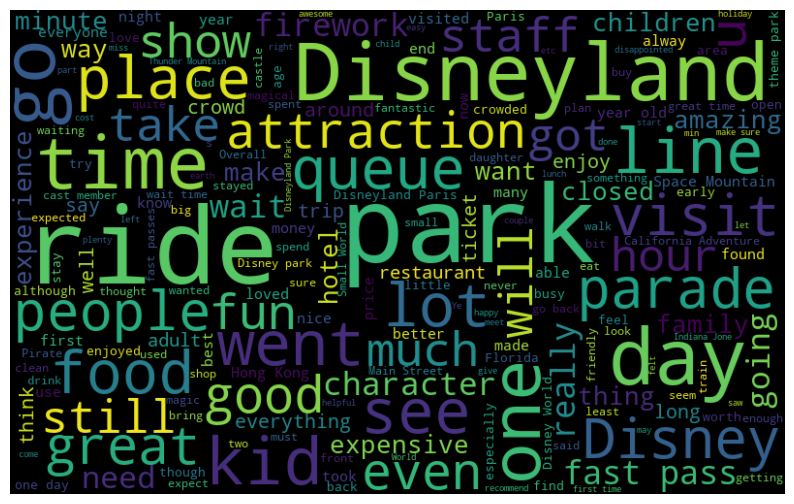

In [25]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([texto for texto in df['review']])
len(todas_palavras)
nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

### QUESTÃO 7

### QUESTÃO 8

In [ ]:
!pip install nltk
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência": list(frequencia.values())})